In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv(r"E:\python code(nikita niraj)\spyder code\Advertising.csv",header=0,index_col=0)
data.head()

print(data.dtypes)
print(data.shape)
print(data.describe())


TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


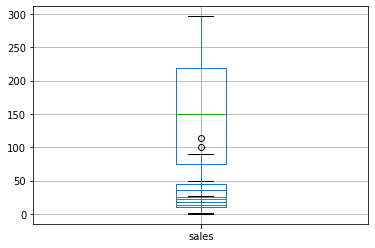

In [6]:
# assumption 
# 1) no outerliers in data check by boxplots

data.boxplot(column="radio")
data.boxplot(column="newspaper")
data.boxplot(column="TV")
data.boxplot(column="sales")


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


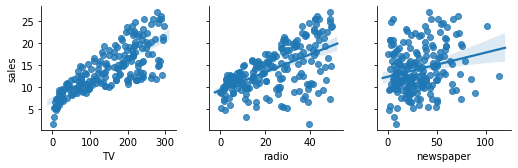

In [7]:
#2) Assumption of Linearity:Every ind var should have a 
#linear relationship with the dep var
sns.pairplot(data,x_vars=["TV","radio","newspaper"],y_vars="sales",kind='reg')


In [8]:
# create X and Y
X = data[['TV', 'radio', 'newspaper']]
Y = data['sales']


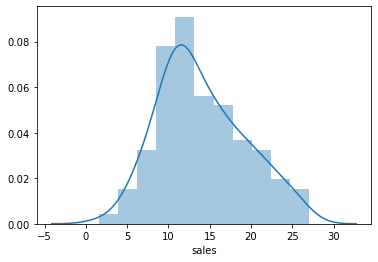

In [9]:
# ASSUMPTION NO 3
# Assumption of normality: The dependent variable should follow an 
#approximate normal distribution
sns.distplot(Y,hist=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ADC456F3C8>,
      dtype=object)

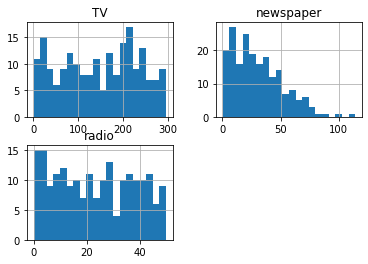

In [10]:
# perfor log tracformation which the var are having skeewness 
# check the X var also
X.hist(bins=20)


In [38]:
from scipy.stats import skew
data_num_skew = X.apply(lambda x: skew(x.dropna()))
print(data_num_skew)

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64


In [12]:
# subset the that var we hava the skewness in between 
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]


In [13]:
print(data_num_skew)
print(data_num_skewed)


TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


In [14]:
import numpy as np
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])


C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [15]:
# 4) assumption # corr renge -1 negetive cor  0 no corr +1 positive corr
#there should be no multicolinearity in the data

corr_df=X.corr(method="pearson")
print(corr_df)  



                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


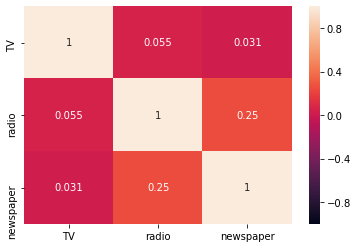

In [16]:
# vmax=1.0,vmin=-1.0 colour renge 
# we have the corr 0.7 the remove the variable
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)


In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)


C:\Users\Dell\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1872: RuntimeWarning: invalid value encountered in greater
  return count_nonzero(S > tol, axis=-1)


,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [18]:
# split the data into train and test
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=10)

X_train.shape


(160, 3)

In [19]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)


Ridge()

In [20]:
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [21]:
Y_pred=lm.predict(X_test)


In [22]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np


In [23]:

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348082644975935
2.5929204626839977
0.8322798195664342


In [24]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)


Lasso()

In [25]:
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [26]:
Y_pred=lm.predict(X_test)


In [27]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.8360506658527163
2.5831514271094234
0.8335412372688292


In [28]:

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

linear regression(model)

In [29]:
# linear regg
# now run the model
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train) # traing part (this is the X value then,this is the Y value)


LinearRegression()

In [30]:
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)


3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]


In [31]:
# pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))


[('TV', 0.04374250157742165), ('radio', 0.19303707897345296), ('newspaper', -0.04895136822248785)]


In [32]:
# predict the Y values
y_pred=lm.predict(X_test)
print(y_pred)


[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [33]:
new_df=pd.DataFrame()
new_df=X_test

In [34]:
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=y_pred
new_df


C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [35]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.834801071903532
2.59297691109306
0.8322725168816474


In [36]:
print(min(Y_test))
print(max(Y_test))


1.6
25.5


In [37]:
#creat the end file
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
#new_df.to_excel(r"E:\python code(neeraj)\spyder code\Advertising_output.xlsx",header=True,index=True)
print(new_df)


        TV  radio  newspaper  Actual sales  Predicted sales  Deviation
60   210.7   29.5   2.332144          18.4        18.150269   0.249731
6      8.7   48.9   4.330733           7.2        12.961369  -5.761369
21   218.4   27.7   3.996364          18.0        18.058153  -0.058153
199  283.6   42.0   4.207673          25.5        23.660251   1.839749
53   216.4   41.7   3.703768          22.6        20.687510   1.912490
20   147.3   23.9   3.000720          14.6        14.263259   0.336741
163  188.4   18.1   3.280911          14.9        14.927745  -0.027745
56   198.9   49.4   4.110874          23.7        21.388474   2.311526
70   216.8   43.9   3.339322          22.3        21.147529   1.152471
3     17.2   45.9   4.252772           9.3        12.757885  -3.457885
99   289.7   42.3   3.955082          25.4        23.997356   1.402644
11    66.1    5.8   3.226844           8.6         7.206327   1.393673
76    16.9   43.7   4.504244           8.7        12.307771  -3.607771
143  2

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
